<a href="https://colab.research.google.com/github/nakul-jindal/Reddit-post-classification/blob/main/Reddit_Post_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install html5lib
#!pip install lxml
#!pip install selenium
#from selenium import webdriver
#from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
!pip install praw
import praw 
reddit = praw.Reddit(client_id='6S2KmMdFMXB5_w' ,client_secret='pArC5wEshiS0jouk1RKZ7e_AtY4', user_agent='nkl',username='PerfectCarpet',password='nakul2001')
rindia = reddit.subreddit('india')

In [ ]:
posts_ = []
for post in rindia.hot(limit=10000):
    posts_.append([post.title, post.score,post.link_flair_css_class, post.num_comments, post.selftext])
for post in rindia.top(limit=10000):
    posts_.append([post.title, post.score,post.link_flair_css_class, post.num_comments, post.selftext])
for post in rindia.rising(limit=10000):
    posts_.append([post.title,post.score,post.link_flair_css_class, post.num_comments, post.selftext])
for post in rindia.new(limit=10000):
    posts_.append([post.title,post.score,post.link_flair_css_class, post.num_comments, post.selftext])             

In [ ]:
posts = pd.DataFrame(posts_,columns=['title','score','flair','num_comments','selftext'])  
posts 

In [ ]:
posts=posts[['title','flair','selftext']]

In [ ]:
posts = posts[pd.notnull(posts['flair'])]
posts=posts.drop_duplicates(keep=False , inplace=False , ignore_index=True)
posts

In [ ]:
posts = pd.read_csv('totalfinaldata.csv')
posts = posts[pd.notnull(posts['flare'])]
posts

,Unnamed: 0,title,score,id,flare,subreddit,url,num_comments,created,Unnamed: 9
0,151,Fat cat VCs and start-ups raising thousands of...,73,fzyc4y,business /econmy,india,https://www.moneylife.in/article/fat-cat-vcs-a...,2,1.586733e+09,NaN
1,152,Amazon Prime Now delivery app to shut down in ...,22,g015ho,business /econmy,india,https://m.hindustantimes.com/tech/amazon-prime...,3,1.586742e+09,NaN
2,153,Thoughts on social crowdfunding platforms?,3,fzz8v4,business /econmy,india,https://www.reddit.com/r/india/comments/fzz8v4...,0,1.586736e+09,NaN
3,154,People’s Bank of China picks up 1.75 crore sha...,11,fzsa3l,business /econmy,india,https://www.moneycontrol.com/news/business/peo...,2,1.586705e+09,NaN
4,155,These so called grocery apps.,25,fz6429,business /econmy,india,https://www.reddit.com/r/india/comments/fz6429...,13,1.586643e+09,NaN
...,...,...,...,...,...,...,...,...,...,...
3887,622,Social distancing at stall of vegetable vendor...,1640,fo9v4v,Coronavirus,india,https://i.redd.it/nwbw3kl9vno41.jpg,49,1.585102e+09,NaN
3888,623,"The social distance called ""priviledge""",1636,fscym1,Coronavirus,india,https://i.redd.it/ibcyvpn6g0q41.jpg,163,1.585690e+09,NaN
3889,624,I am a doctor working in a COVID-19 screening ...,1610,fq1nzj,Coronavirus,india,https://www.reddit.com/r/india/comments/fq1nzj...,306,1.585360e+09,NaN
3890,625,Social Distancing level- Dad,1529,fokifq,Coronavirus,india,https://i.redd.it/r8lriw9a3ro41.jpg,44,1.585141e+09,NaN


In [ ]:
for i in range(0, len(posts)):
  if posts['flare'][i]=='Food':
    posts['flare'][i]='food'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []
for i in range(0, len(posts)):
    title = re.sub('[^a-zA-Z?]', ' ', posts['title'][i])
    title = title.lower()
    title = title.split()
    ps = PorterStemmer()
    title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
    title = ' '.join(title)
    corpus.append(title)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 15000)
X = cv.fit_transform(corpus).toarray()

In [ ]:
y=posts.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
Labelencoder=LabelEncoder()
y=Labelencoder.fit_transform(y)
Labelencoder.classes_

array(['Coronavirus', 'Entertainment', 'Non-Political', 'Politics',
       'Science Technology', 'business /econmy', 'food'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.675224646983312


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


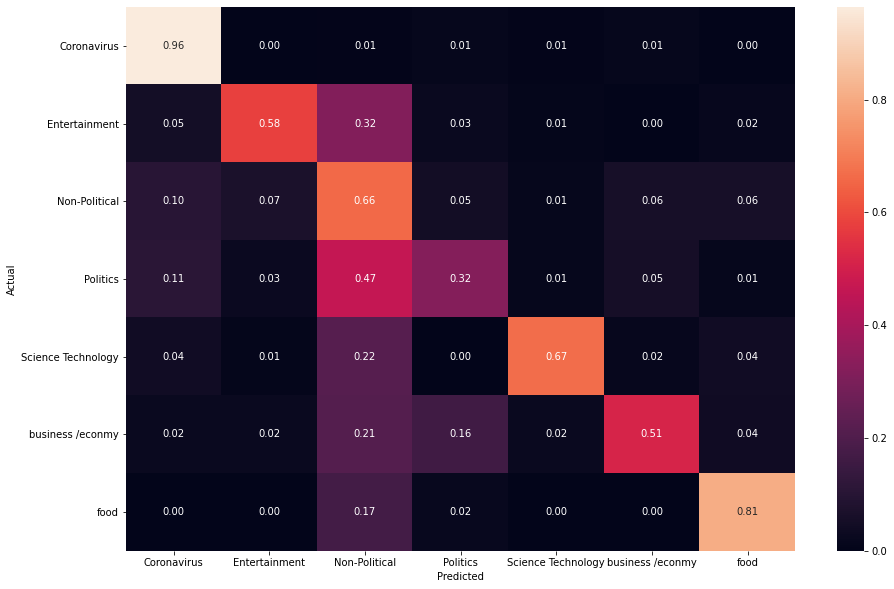

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#target_names = (['business','cor', 'ent' , 'food' , 'non-pol' , 'pol' , 'tech'])
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=Labelencoder.classes_, yticklabels=Labelencoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

0.9987150658528751


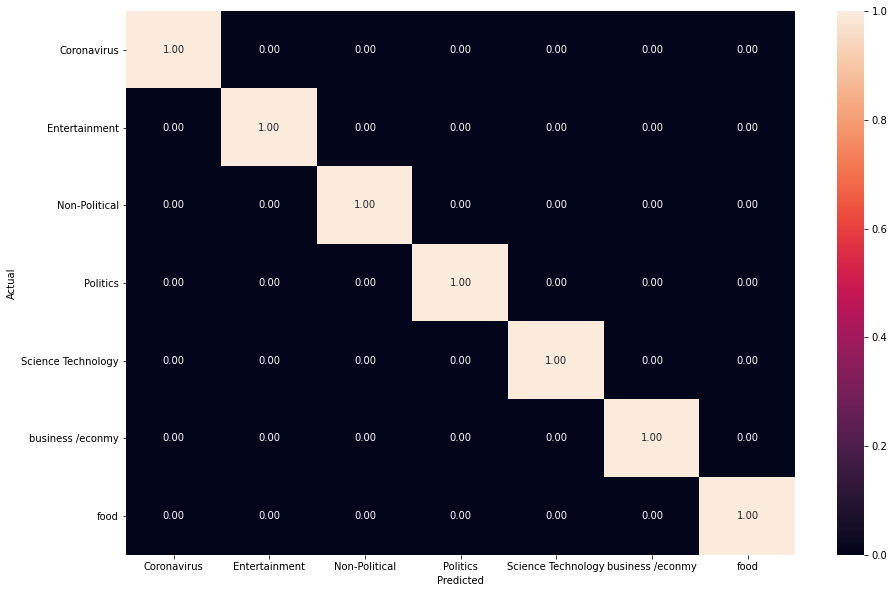

In [ ]:
y_pred = classifier.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred))
cm = confusion_matrix(y_train, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=Labelencoder.classes_, yticklabels=Labelencoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


In [ ]:
import pylab as pl
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
import matplotlib.pyplot as plt
labels = ['Coronavirus', 'Entertainment', 'Non-Political', 'Politics',
       'Science Technology', 'business /econmy', 'food']
cm = metrics.confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Coronavirus', 'Entertainment', 'Non-Political', 'Politics',
       'Science Technology', 'business /econmy', 'food']); ax.yaxis.set_ticklabels(['Coronavirus', 'Entertainment', 'Non-Political', 'Politics',
       'Science Technology', 'business /econmy', 'food']);

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Cov', 'Ent', 'NonP', 'Pol',
       'SnT', 'biz', 'food']); ax.yaxis.set_ticklabels(['Cov', 'Ent', 'NonP', 'Pol',
       'SnT', 'biz', 'food']);